# Analiza ankiety przeprowadzonej wśród młodych Słowaków 

### Analiza danych z ankiety odnośnie cech, preferencji, zainteresowań, zwyczajów, opinii i obaw młodych ludzi z uwzględnieniem tego czy respondent żyje na wsi czy w mieście oraz przeanalizowanie spożycia alkoholu wśród respondentów

##### Zaczniemy od analizy naszego zbioru daych, aby uzyskać pewne informacje na jego temat:

In [21]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils.math_functions import median, mean, stddev

%matplotlib inline

response_no = []
responders_ages = []
responders_heights = []
responders_weights = []


def read_age_from_csv():
    with open('resources/young-people-survey/responses.csv') as csv_file:
        read_csv = csv.reader(csv_file, delimiter=',')
        headers = []
        headers_read = False
        response_idx = 0
        for row in read_csv:
            if not headers_read:
                headers = row
                headers_read = True
                continue
            response_no.append(response_idx)
            try:
                responders_ages.append(int(row[headers.index("Age")]))
                responders_heights.append(int(row[headers.index("Height")]))
                responders_weights.append(int(row[headers.index("Weight")]))
            except ValueError:
                pass
            response_idx += 1

read_age_from_csv()
df = pd.read_csv('resources/young-people-survey/responses.csv')
df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


In [22]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


##### Podstawowe wielkości statystyczne opisujące wiek respondentów:

In [23]:
print("Average responder age is %f" % mean(responders_ages))
print("Median of responders age is %d" % median(responders_ages))
print("Standard deviation of responders age is %f" % stddev(responders_ages))

Average responder age is 20.433699
Median of responders age is 20
Standard deviation of responders age is 2.827430


Wykres pudełkowy opisujący wiek respondentów:

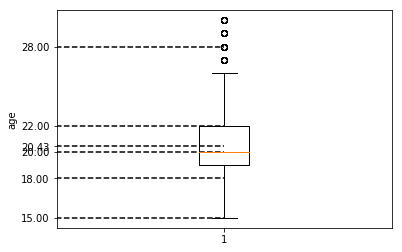

In [24]:
def show_responders_box_plot(data, ylabel):
    data_median = median(data)
    sub_data_Q1 = list(filter(lambda x: x < data_median, data))
    sub_data_Q3 = list(filter(lambda x: x > data_median, data))
    Q1 = median(sub_data_Q1)
    Q3 = median(sub_data_Q3)
    IQR = Q3 - Q1
    flier_low = max(min(data), Q1 - 1.5 * IQR)
    flier_high = max(min(data), Q3 + 1.5 * IQR)
    fig, ax = plt.subplots()
    ax.boxplot(data, showfliers=True)
    plt.hlines(y=[flier_high, mean(data), Q1, Q3, data_median, flier_low], xmin=0, xmax=1, colors='k',
               linestyles='dashed')
    plt.yticks([flier_high, Q1, Q3, mean(data), data_median, flier_low])
    plt.ylabel(ylabel)
    plt.show()

show_responders_box_plot(responders_ages, "age")

Histogram wieku respondentów:

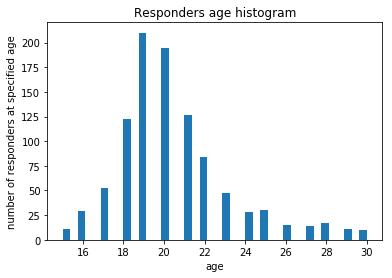

In [25]:
def show_responders_histogram(data, label, lower_bound, upper_bound, bin_count=plt.rcParams["hist.bins"]):
    plt.title("Responders " + label + " histogram")
    plt.xlabel(label)
    if label == "age":
        plt.ylabel("number of responders at specified age")
    else:
        plt.ylabel("number of responders with specified " + label)
    plt.hist(data, bins=bin_count, range=(lower_bound, upper_bound))
    plt.show()
   
show_responders_histogram(responders_ages, "age", 15, 30, 40)

##### Podstawowe wielkości statystyczne opisujące wzrost respondentów:

In [26]:
print("Average responder height is %f" % mean(responders_heights))
print("Median of responders height is %d" % median(responders_heights))
print("Standard deviation of responders height is %f" % stddev(responders_heights))

Average responder height is 173.530364
Median of responders height is 173
Standard deviation of responders height is 10.023055


Wykres pudełkowy opisujący wzrost reszpondentów:

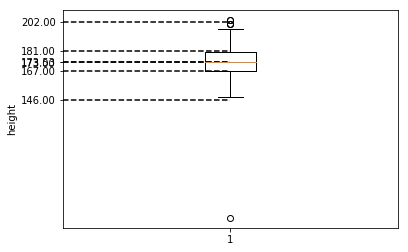

In [27]:
def show_responders_box_plot(data, ylabel):
    data_median = median(data)
    sub_data_Q1 = list(filter(lambda x: x < data_median, data))
    sub_data_Q3 = list(filter(lambda x: x > data_median, data))
    Q1 = median(sub_data_Q1)
    Q3 = median(sub_data_Q3)
    IQR = Q3 - Q1
    flier_low = max(min(data), Q1 - 1.5 * IQR)
    flier_high = max(min(data), Q3 + 1.5 * IQR)
    fig, ax = plt.subplots()
    ax.boxplot(data, showfliers=True)
    plt.hlines(y=[flier_high, mean(data), Q1, Q3, data_median, flier_low], xmin=0, xmax=1, colors='k',
               linestyles='dashed')
    plt.yticks([flier_high, Q1, Q3, mean(data), data_median, flier_low])
    plt.ylabel(ylabel)
    plt.show()

show_responders_box_plot(responders_heights, "height")

Histogram wzrostu respondentów:

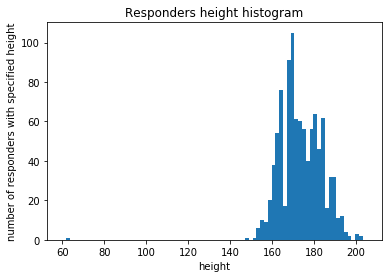

In [28]:
def show_responders_histogram(data, label, lower_bound, upper_bound, bin_count=plt.rcParams["hist.bins"]):
    plt.title("Responders " + label + " histogram")
    plt.xlabel(label)
    if label == "age":
        plt.ylabel("number of responders at specified age")
    else:
        plt.ylabel("number of responders with specified " + label)
    plt.hist(data, bins=bin_count, range=(lower_bound, upper_bound))
    plt.show()
    
show_responders_histogram(responders_heights, "height", 60, 205, 80)

##### Podtsawowe wielkości statystyczne opisujące wagę respondentów

In [29]:
print("Average responder weight is %f" % mean(responders_weights))
print("Median of responders weight is %d" % median(responders_weights))
print("Standard deviation of responders weight is %f" % stddev(responders_weights))

Average responder weight is 66.351738
Median of responders weight is 64
Standard deviation of responders weight is 13.506758


Wykres pudełkowy opisujący wagę respondentów:

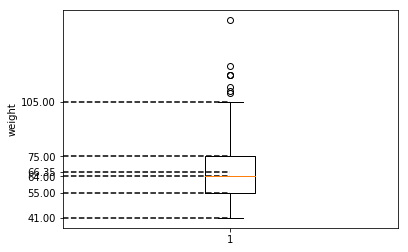

In [30]:
def show_responders_box_plot(data, ylabel):
    data_median = median(data)
    sub_data_Q1 = list(filter(lambda x: x < data_median, data))
    sub_data_Q3 = list(filter(lambda x: x > data_median, data))
    Q1 = median(sub_data_Q1)
    Q3 = median(sub_data_Q3)
    IQR = Q3 - Q1
    flier_low = max(min(data), Q1 - 1.5 * IQR)
    flier_high = max(min(data), Q3 + 1.5 * IQR)
    fig, ax = plt.subplots()
    ax.boxplot(data, showfliers=True)
    plt.hlines(y=[flier_high, mean(data), Q1, Q3, data_median, flier_low], xmin=0, xmax=1, colors='k',
               linestyles='dashed')
    plt.yticks([flier_high, Q1, Q3, mean(data), data_median, flier_low])
    plt.ylabel(ylabel)
    plt.show()
    
show_responders_box_plot(responders_weights, "weight")

Histogram wagi respondentów:

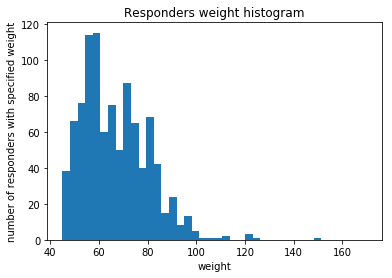

In [31]:
def show_responders_histogram(data, label, lower_bound, upper_bound, bin_count=plt.rcParams["hist.bins"]):
    plt.title("Responders " + label + " histogram")
    plt.xlabel(label)
    if label == "age":
        plt.ylabel("number of responders at specified age")
    else:
        plt.ylabel("number of responders with specified " + label)
    plt.hist(data, bins=bin_count, range=(lower_bound, upper_bound))
    plt.show()
    
show_responders_histogram(responders_weights, "weight", 45, 170, 40)    

#### Brakujące wartości:

Brakujące wartości są problematyczne, ponieważ nie wiemy, co było przyczyną tego, że respondenci nie wypełnili danego pola w ankiencie. Możliwe także, że braki pewnych wartości były wynikiem tego, że np. niektóre dane nie zostały przeniesione z ankiety do formularza cyfrowego.

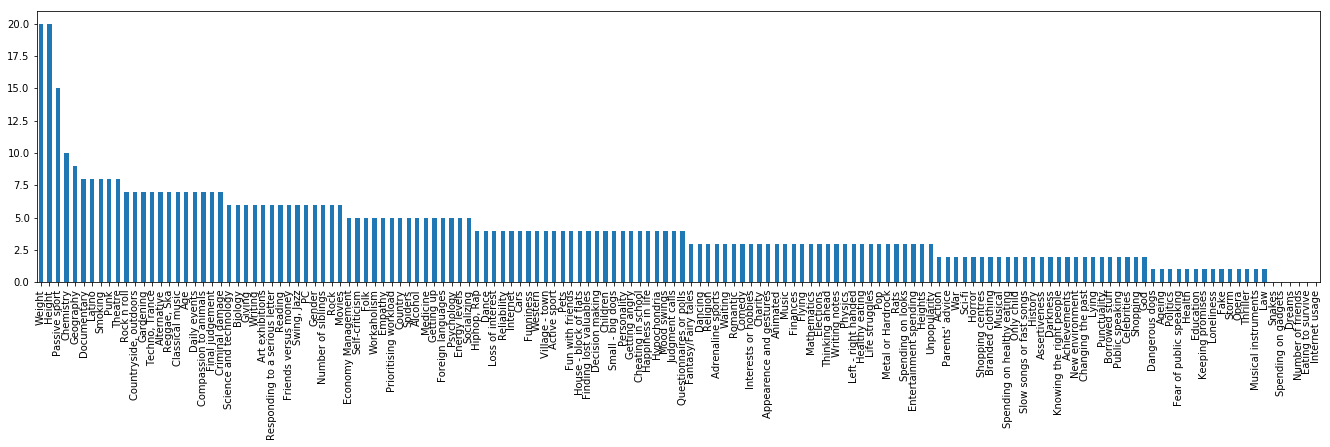

In [32]:
def display_missing_values(df):
    nulls = df.isnull().sum().sort_values(ascending=False)
    nulls.plot(kind='bar', figsize=(23, 5))
    plt.show()
    
display_missing_values(df)

In [33]:
def display_missing_values_info(df):
    print('Number of girls who omitted weight field: {:.0f}'.format(
        df[df['Gender'] == 'female']['Weight'].isnull().sum()))
    print('Number of boys who omitted weight field: {:.0f}'.format(
        df[df['Gender'] == 'male']['Weight'].isnull().sum()))
    print('Number of girls who omitted height field: {:.0f}'.format(
        df[df['Gender'] == 'female']['Height'].isnull().sum()))
    print('Number of boys who omitted height field: {:.0f}'.format(
        df[df['Gender'] == 'male']['Height'].isnull().sum()))
    
display_missing_values_info(df)

Number of girls who omitted weight field: 13
Number of boys who omitted weight field: 6
Number of girls who omitted height field: 13
Number of boys who omitted height field: 6


Powyższe dane wyglądają podejrzanie. W treści opisującej zbiór danych możemy znaleźć fragment: "In 2013, students of the Statistics class at FSEV UK were asked to invite their **friends** to participate in this survey.". Można zatem postawić hipotezę, iż młodzi słowaccy respondenci, wiedząc, że ich dane będą potem analizowane przez ich **przyjaciół**, nie dostarczyli takich danych jak waga, wiek czy wzrost, w obawie, że mogliby zostać przez swoich znajomych zidentyfikowani. Przyjrzymy się zatem im bliżej tym danym i spróbujmy zweryfikować tę hipotezę.

In [34]:
def display_missing_values_further_info(df):
    omitted = df[(df['Weight'].isnull()) | df['Height'].isnull()]
    print('Number of people with omitted Weight or Height: {:.0f}'.format(omitted.shape[0]))
    nas = omitted.drop(['Weight', 'Height', 'Number of siblings', 'Age'], 1).isnull().sum().sum()
    print('Number of fields that were omitted by people who did not fill Weight or Height: {:.0f}'.format(nas))
    
display_missing_values_further_info(df)

Number of people with omitted Weight or Height: 30
Number of fields that were omitted by people who did not fill Weight or Height: 18


Zauważmy, że Ci respondenci, którzy pominęli w ankiecie takie pola jak waga, wiek, wzrost lub liczbę posiadanego rodzeństwa pominęli także 18 innych pól w ankiecie, co może świadczyć o słyszności postawionej wcześniej hipotezy co do obawy respondentów przed identyfikacją przez znajomych.

Analizowany przez na zbiór danych pozwala na zdefiniowanie wielu celów analizy danych. Z tego względu spojrzeliśmy na dane pod takim kątem, aby podjąć próbę wskazania różnic i podobieńst pomiędzy życiem w mieście a życiem na wsi (bazując na odpowiedziach respondentów). 
Z tego powodu **opuścimy rekordy, które nie mają wartości w kolumnie o nazwie "Village - town"**.

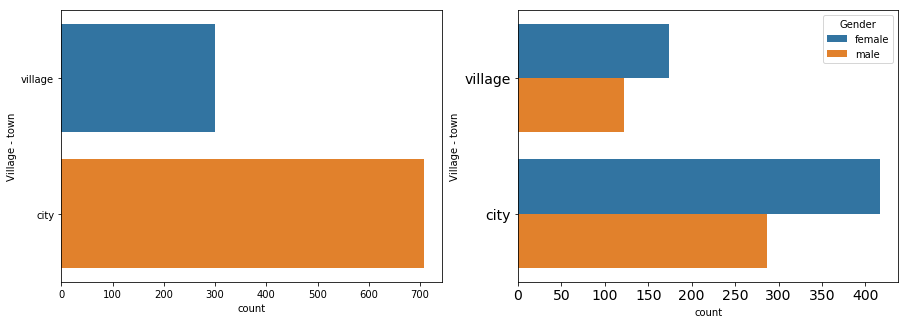

In [35]:
def drop_rows_without_values_and_display_village_vs_city_stats(column_name, df):
    interesting_var = column_name
    mapping = {interesting_var: {'city': 0, 'village': 1}}
    df.dropna(subset=[interesting_var], inplace=True)
    # to have ability to use hue parameter in seaborn for better comparison
    df["all"] = ""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.countplot(y=interesting_var, data=df, ax=ax[0])
    sns.countplot(y=interesting_var, hue='Gender', data=df, ax=ax[1])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
    return interesting_var

interesting_var = drop_rows_without_values_and_display_village_vs_city_stats('Village - town', df)

Jak widzimy, powyższe klasy są bardzo niezbalansowane (przeszło dwa razy więcej respondentów mieszkało w mieście). Gdybyśmy przygotowywali dane pod zbiór testowy i treningowy do jakiegoś algorytmu ML, to ów brak balansu może być problematyczny.

#### Dane odstające

Zwróćmy w tym miejscu uwagę, czy występują jakieś różnice pod względem wagi, wzrostu czy wieku pomiędzy respondentami zamieszkującymi wieś i miasto. 

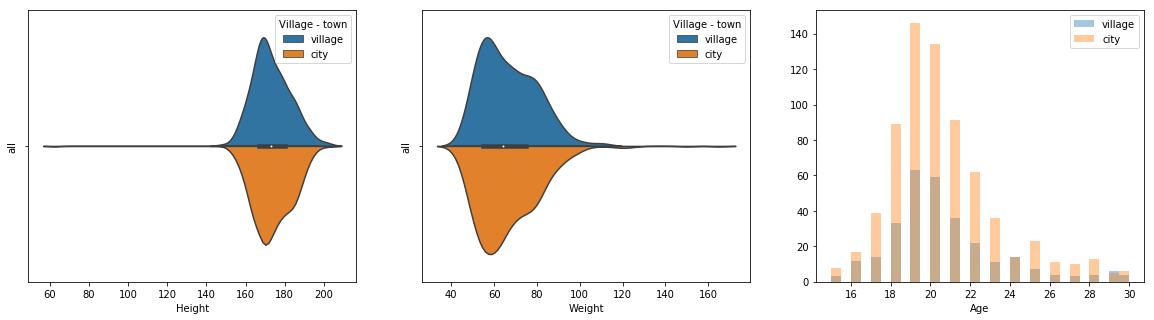

In [36]:
def city_vs_village_height_weight_age_comparison(df, interesting_var):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    data = df.dropna(subset=['Height'])
    sns.violinplot(x='Height', y="all", hue=interesting_var, data=data, split=True, ax=ax[0]);
    data = df.dropna(subset=['Weight'])
    sns.violinplot(x='Weight', y="all", hue=interesting_var, data=data, split=True, ax=ax[1]);
    interesting_var_ser = df[interesting_var]
    sns.distplot(df[interesting_var_ser == 'village'].Age.dropna(),
                 label='village', ax=ax[2], kde=False, bins=30)
    sns.distplot(df[interesting_var_ser == 'city'].Age.dropna(),
                 label='city', ax=ax[2], kde=False, bins=30)
    ax[2].legend()
    plt.show()
    
city_vs_village_height_weight_age_comparison(df, interesting_var)

Jak mogliśmy wcześniej zaobserwować (na histogramach i wykresach pudełkowych) występują pewne dane odstające, które zaburzają wizualizacje.

In [37]:
def some_outliers_display(df, interesting_var):
    display(df[df['Height'] < 65][['Age', 'Height', 'Weight', 'Gender', interesting_var]])
    print()
    display(df[df['Weight'] > 115][['Age', 'Height', 'Weight', 'Gender', interesting_var]])
    
some_outliers_display(df, interesting_var)

,Age,Height,Weight,Gender,Village - town
676,20.0,62.0,55.0,female,city


,Age,Height,Weight,Gender,Village - town
292,21.0,184.0,120.0,female,city
793,24.0,185.0,120.0,male,city
859,20.0,190.0,125.0,male,city
885,23.0,NaN,165.0,female,city
973,20.0,175.0,120.0,female,city
992,30.0,200.0,150.0,male,city


Analizując powyższe tabele, należy także poważnie rozważyć hipotezę, że respondenci mogli pomylić rubryki i wpisać w pole 'Height' swoją wagę a w pole 'Weight' wpisać wzrost. Przykładowo **pozycja o indeksie 885 w drugiej z tabel nie zawiera wartości w polu 'Height' i zawiera wartość 165 kg w polu 'Weight'**, co może wskazywać na to, że kobieta wypełniająca ankietę omyłkowo wpisała swój wzrost w rubryce, w której powinna wpisać wagę.

Zaprezentowane dane odstające zostaną wykluczone z dalszej analizy.

In [38]:
def drop_outliers(df):
    df.drop([676, 292, 793, 859, 885, 973, 992], inplace=True)
    
drop_outliers(df)

In [39]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,996.000000,997.000000,995.000000,994.000000,994.000000,992.000000,997.000000,996.000000,993.000000,996.000000,...,998.000000,997.000000,996.000000,996.000000,999.000000,997.000000,992.000000,980.000000,979.000000,993.000000
mean,4.734940,3.324975,3.110553,2.288732,2.119718,2.957661,2.759278,3.473896,3.764350,2.358434,...,3.237475,3.053159,3.197791,3.104418,2.865866,3.555667,20.416331,173.536735,66.012257,1.300101
std,0.658935,0.836365,1.168775,1.138069,1.074634,1.255551,1.261981,1.158027,1.187493,1.372757,...,1.320587,1.305757,1.188739,1.203488,1.285820,1.095885,2.815385,9.336063,12.785946,1.016284
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,148.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,20.000000,172.500000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,203.000000,113.000000,10.000000


Dane przed dokonaniem ich obcięcia:
<img src="resources/before_drop1.png">
<img src="resources/before_drop2.png">

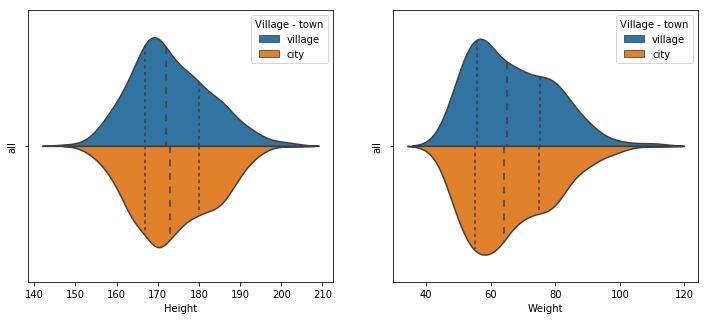

In [40]:
def city_vs_village_height_weight_age_comparison_after_outliers_drop(df, interesting_var):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    data = df.dropna(subset=['Height'])
    sns.violinplot(x='Height', y="all", hue=interesting_var, data=data,
                   split=True, ax=ax[0], inner='quartile')

    data = df.dropna(subset=['Weight'])
    sns.violinplot(x='Weight', y="all", hue=interesting_var, data=data,
                   split=True, ax=ax[1], inner='quartile')
    
city_vs_village_height_weight_age_comparison_after_outliers_drop(df, interesting_var)

Linie horyzontalne na powyższych wykresach oznaczają kwartyle.

#### Analiza spożycia alkoholu

Korzystając z dostępnych nam narzędzi możemy zbadać, jaka jest deklarowana ilośc spożywanego alkoholu w zależności od wieku respondentów

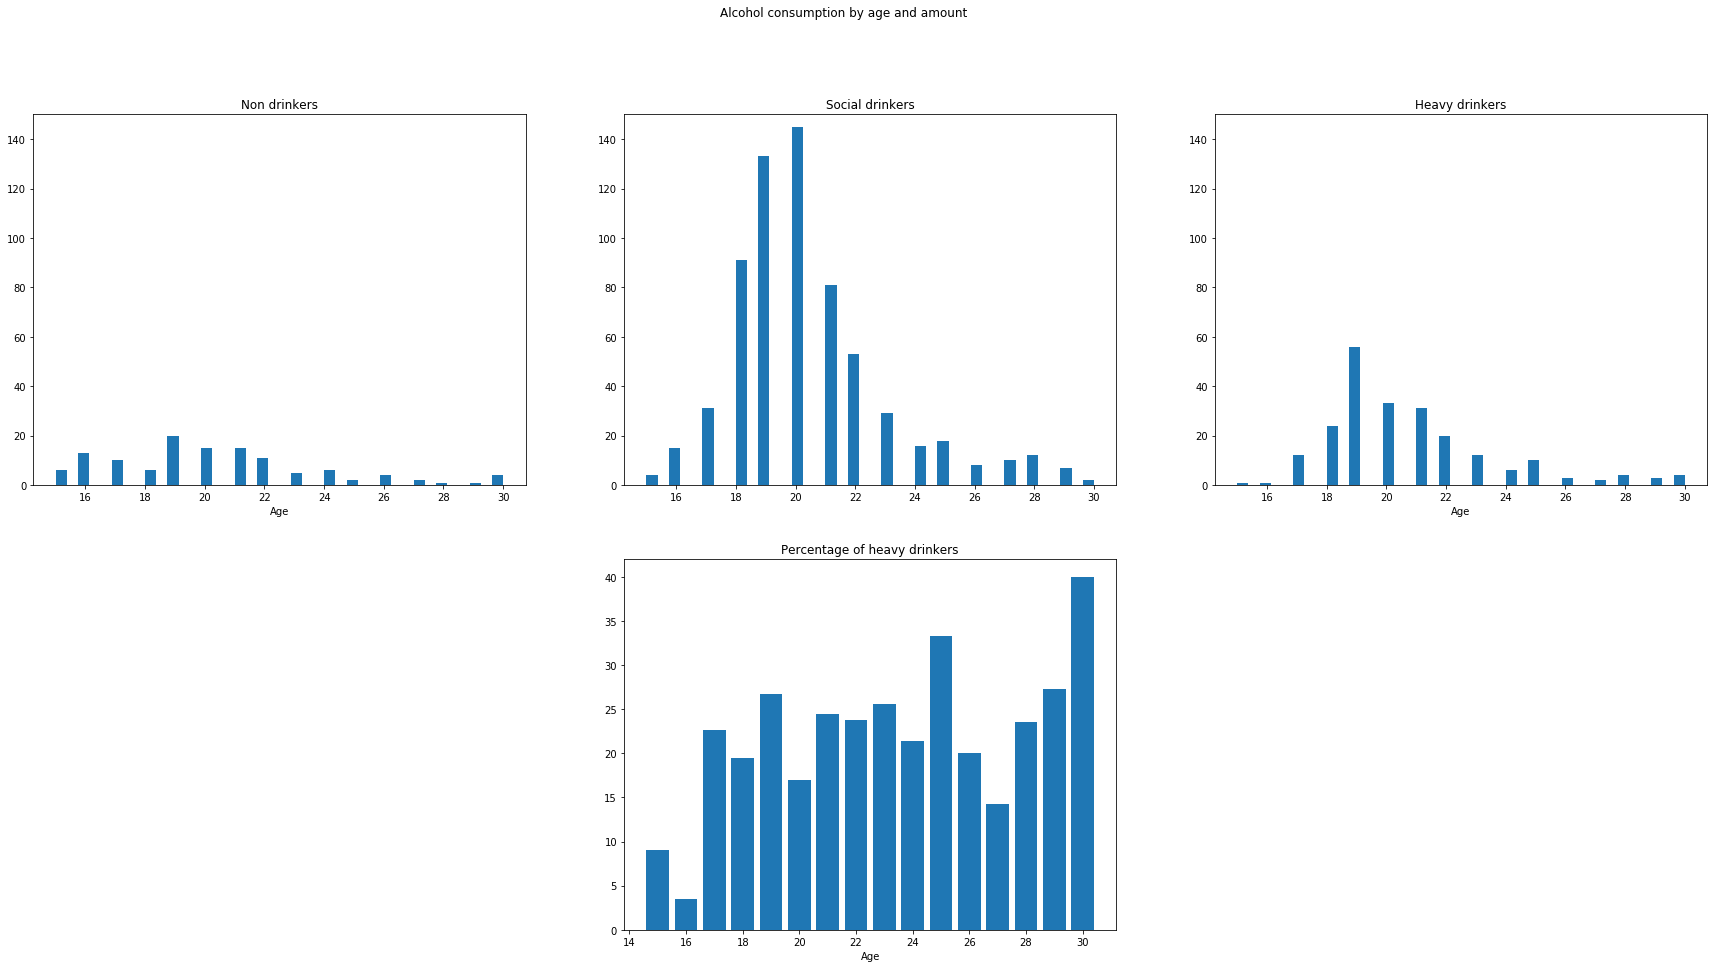

In [42]:
import csv
import matplotlib.pylab as plt


def alcohol_consumption():
    with open('resources/young-people-survey/responses.csv') as csv_file:
        read_csv = csv.reader(csv_file, delimiter=',')
        headers = []
        headers_read = False
        heavy_drinkers = []
        social_drinkers = []
        non_drinkers = []

        heavy_drinkers_by_age = dict()
        total_by_age = dict()
        percentage_of_heavy_drinkers = []

        for i in range(15, 31):
            heavy_drinkers_by_age[i] = 0
            total_by_age[i] = 0

        for row in read_csv:
            if not headers_read:
                headers = row
                headers_read = True
                continue

            try:
                age = int(row[headers.index("Age")])
                how_much = row[headers.index("Alcohol")]
                if how_much == "drink a lot":
                    heavy_drinkers.append(age)
                    heavy_drinkers_by_age[age] = heavy_drinkers_by_age[age] + 1
                if how_much == "social drinker":
                    social_drinkers.append(age)
                if how_much == "never":
                    non_drinkers.append(age)
                total_by_age[age] = total_by_age[age] + 1

            except ValueError:
                pass

        for i in range(15, 31):
            percentage_of_heavy_drinkers.append((heavy_drinkers_by_age[i] / total_by_age[i]) * 100)

        plt.subplot(231)
        plt.xlabel("Age")
        plt.title("Non drinkers")
        plt.ylim(0, 150)
        plt.hist(non_drinkers, 40, range=(15, 30))

        plt.subplot(232)
        plt.title("Social drinkers")
        plt.ylim(0, 150)
        plt.hist(social_drinkers, 40, range=(15, 30))

        plt.subplot(233)
        plt.xlabel("Age")
        plt.title("Heavy drinkers")
        plt.ylim(0, 150)
        plt.hist(heavy_drinkers, 40, range=(15, 30))

        plt.subplot(235)
        plt.xlabel("Age")
        plt.title("Percentage of heavy drinkers")
        ages = range(15, 31)
        plt.bar(ages, percentage_of_heavy_drinkers)

        plt.suptitle("Alcohol consumption by age and amount")

        plt.rcParams['figure.figsize'] = [30, 15]
        plt.show()


alcohol_consumption()

Gdy spojrzymy na powyższe wykresy, w szczególnosci wykres mówiący o procencie osób spożywająch dużą ilość alkoholu w zalęzności od grupy wiekowej, możemy wywnioskować, że dla grupy 30-latków aż 40% zadeklarowało spożycie dużej ilości alkoholu. Kolejnym niepokojącym faktem jest to, iż więcej osób zadeklarowało spożycie dużej ilości alkoholu, niż brak jego spożycia.

#### Analiza próbki z populacji

In [43]:
import csv
import matplotlib.pylab as plt
import random
import math


def sample_test():
    with open('resources/young-people-survey/responses.csv') as csv_file:
        read_csv = csv.reader(csv_file, delimiter=',')
        headers = []
        headers_read = False
        
        heavy_drinkers = 0
        total = 0
        all_drinkers = []

        for row in read_csv:
            if not headers_read:
                headers = row
                headers_read = True
                continue

            try:
                how_much = row[headers.index("Alcohol")]
                if how_much == "drink a lot":
                    heavy_drinkers = heavy_drinkers + 1
                all_drinkers.append(how_much)
                total = total + 1

            except ValueError:
                pass

        heavy_drinkers_percentage = ( heavy_drinkers / total ) * 100

        print(str(heavy_drinkers_percentage) + "% of responders declared themselves as heavy drinkers")

        sample_size = 100
        sample = random.sample(all_drinkers, sample_size)

        heavy_drinkers_sample = 0

        for how_much in sample:
            if how_much == 'drink a lot':
                heavy_drinkers_sample = heavy_drinkers_sample + 1

        heavy_drinkers_sample_percentage = ( heavy_drinkers_sample / sample_size ) * 100

        print(str(heavy_drinkers_sample_percentage) + "% of responders from the sample ("+str(sample_size)+" random responders) declared themselves as heavy drinkers")

        standard_error = math.sqrt( heavy_drinkers_sample_percentage * (100 - heavy_drinkers_sample_percentage)/sample_size)

        print("Standard error: " + str(standard_error) + "%")

        a = heavy_drinkers_sample_percentage - 2 * standard_error
        b = heavy_drinkers_sample_percentage + 2 * standard_error

        c = heavy_drinkers_sample_percentage - standard_error
        d = heavy_drinkers_sample_percentage + standard_error

        print("We can be 95% sure that between " + str(a) + " and " + str(b) + " of the total population are heavy drinkers.")
        print("We can be 68% sure that between " + str(c) + " and " + str(d) + " of the total population are heavy drinkers.")


sample_test()

21.980198019801982% of responders declared themselves as heavy drinkers
23.0% of responders from the sample (100 random responders) declared themselves as heavy drinkers
Standard error: 4.208325082500163%
We can be 95% sure that between 14.583349834999675 and 31.416650165000327 of the total population are heavy drinkers.
We can be 68% sure that between 18.791674917499837 and 27.208325082500163 of the total population are heavy drinkers.


##### Wnioski

Procentowa ilość osób dużo pijących w całej populacji znajduje się w przedziale ufności wartosci wyliczonej przy użyciu próbki 100 osób.

### Zbiorcze wnioski z analizy danych
* istotne jest aby ankieta była tak skonstruowana, aby respondent nie miał możliwości udzielić odpowiedzi w rubryce, w której powinien zamieścić odpowiedź na inne pytanie -> można tu rozważyć przeprowadzanie ankiety w formie ankiety online, eliminujemy przy tym ewentualne błędy, które mogłyby powstać przy digitalizacji zebranych danych,
* jeśli zależy nam na tym aby zebrane dane jak najlepiej oddawały sytuację rzeczywistą respondenci nie mogą mieć cienia wątpliwości, że pozostaną ononimowi (tym bardziej jeśli mają wypełniać ankietę dotyczącą m.in. ich obaw)

Andres repozytorium z kodem projektu:
https://github.com/kaspiotr/YoungPeopleSurvey